In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from datasets import DSBDataset
import transforms as segtrans
import numpy as np
from utils.visualize import display_boxes, show_preds
import torch
from torch.autograd import Variable
from models import RetinaNet 
import torch.nn.functional as F
from utils.object_detection import get_detection_targets
from utils.object_detection import apply_anchor_deltas

In [2]:
ROOT = '/home/austin/data/dsb'

In [3]:
transforms = segtrans.JointCompose([segtrans.Resize(300),
                                    segtrans.RandomRotate(0, 90),
                                    segtrans.RandomCrop(256, 256),
                                    segtrans.ToTensor()], instance_masks=True)

In [4]:
dataset = DSBDataset(ROOT, transforms, merge_masks=False)

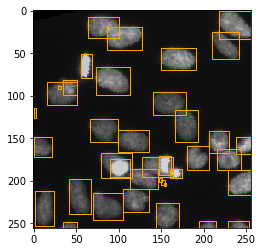

In [5]:
img, masks, boxes = dataset[10]
display_boxes(img.permute(1, 2, 0), boxes)

In [6]:
retinanet = RetinaNet(num_classes=2)

In [7]:
test_img = Variable(img.unsqueeze(0))
class_preds, box_preds = retinanet(test_img)

In [8]:
class_targets, box_targets, anchors = get_detection_targets(test_img.data, boxes)

In [9]:
box_targets


  -0.8839   -1.7678  -19.0615  -15.5958
  -0.7015   -1.4031  -20.2168  -16.7511
  -0.5568   -1.1136  -21.3720  -17.9063
                   ⋮                    
  -2.7345   -1.5123  -11.0144  -15.4420
  -2.1704   -1.2003  -12.1696  -16.5972
  -1.7226   -0.9527  -13.3248  -17.7524
[torch.FloatTensor of size 12276x4]

In [13]:
class_preds.size()

torch.Size([1, 12276, 2])

In [10]:
loss = F.smooth_l1_loss(box_preds, Variable(box_targets)) + F.cross_entropy(class_preds[0], Variable(class_targets), ignore_index=-1)

Variable containing:
 72.6810
[torch.FloatTensor of size 1]

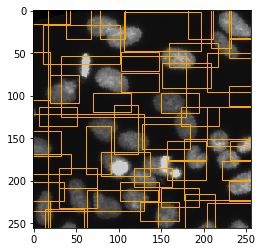

In [12]:
show_preds(img, anchors, box_preds, class_preds)